# Kaggle Titanic Solution

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import re
%matplotlib inline

### Import Train/Test Datasets; both are placed in the same folder as this notebook

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Check first 5 rows of the Train/Test dataset imported

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Check variables and missing value Train/Test

In [5]:
train.describe() #891 rows in Train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test.describe() #418 rows in Test, test start from 892 onwards 

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Concatenate Train and Test & Check Missing Values

In [7]:
titanic = pd.concat([train,test], sort = False)
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


### Check Missing Values using map

In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


### Treat Age & Fare

In [9]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
titanic['Fare'] = titanic['Fare'].fillna(titanic['Fare'].median())
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [10]:
#Age
titanic.loc[ titanic['Age'] <= 16, 'Age'] = 0
titanic.loc[(titanic['Age'] > 16) & (titanic['Age'] <= 32), 'Age'] = 1
titanic.loc[(titanic['Age'] > 32) & (titanic['Age'] <= 48), 'Age'] = 2
titanic.loc[(titanic['Age'] > 48) & (titanic['Age'] <= 64), 'Age'] = 3
titanic.loc[ titanic['Age'] > 64, 'Age'] = 4 ;

In [11]:
# Mapping Fare
titanic.loc[ titanic['Fare'] <= 7.91, 'Fare'] = 0
titanic.loc[(titanic['Fare'] > 7.91) & (titanic['Fare'] <= 14.454), 'Fare'] = 1
titanic.loc[(titanic['Fare'] > 14.454) & (titanic['Fare'] <= 31), 'Fare']   = 2
titanic.loc[ titanic['Fare'] > 31, 'Fare'] = 3

### Treat Cabin

In [12]:
#Check how many missing values are there
#Numpy function is used to get count
np.count_nonzero(titanic['Cabin'].isnull())

1014

In [13]:
#Most cases are missing so we will fill it with 'Missing'
titanic['Cabin'] = titanic['Cabin'].fillna('Missing')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          1309 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


### Treat Embarked

In [14]:
#Check where did most of the passengers Embarked from
titanic['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [15]:
#Use the idxmax to extra the index of a series who value is maximum
titanic['Embarked'].value_counts().idxmax()

'S'

In [16]:
titanic['Embarked'] = titanic['Embarked'].fillna('S')
#Or directly in one line 
#titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].value_counts().idxmax())

In [17]:
#Check again
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [18]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,2.294882,1.294882,0.498854,0.385027,1.500382
std,378.020061,0.486592,0.837836,0.796675,1.041658,0.865560,1.126973
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,655.000000,0.000000,3.000000,1.000000,0.000000,0.000000,2.000000
75%,982.000000,1.000000,3.000000,2.000000,1.000000,0.000000,3.000000
max,1309.000000,1.000000,3.000000,4.000000,8.000000,9.000000,3.000000


# Creating Features

In [19]:
titanic['Pclass'] = titanic['Pclass'].astype(str)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null object
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
dtypes: float64(3), int64(3), object(6)
memory usage: 132.9+ KB


In [20]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

In [21]:
titanic['Title'] = titanic['Name'].apply(get_title)

In [22]:
titanic['Title'] = titanic['Title'].replace(['Capt', 'Col','Dr', 'Major', 'Rev'], 'Officer')
titanic['Title'] = titanic['Title'].replace(['Lady', 'Countess','Don', 'Sir', 'Jonkheer', 'Dona'], 'Royalty')

In [23]:
titanic['Title'] = titanic['Title'].replace(['Mlle', 'Ms'], 'Miss')
titanic['Title'] = titanic['Title'].replace('Mme', 'Mrs')

In [24]:
titanic['Title'].value_counts()

Mr         757
Miss       264
Mrs        198
Master      61
Officer     23
Royalty      6
Name: Title, dtype: int64

In [25]:
titanic['Cabin'] = titanic['Cabin'].str[0]
titanic['Cabin'].value_counts()

M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

In [26]:
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1

titanic['IsAlone'] = 0
titanic.loc[titanic['FamilySize'] == 1, 'IsAlone'] = 1

In [27]:
def get_ticket(ticket):
    txt = ticket.replace("/","")
    txt = txt.replace(".","")
    txt = txt.upper()
    
    if txt.isdigit():
        return 'xxx'
    else:
        title_search = re.search(r'[A-Z]+[A-Z0-9]+|[A-Z]|[A-Za-z]', txt)
        # If the title exists, extract and return it.
        if title_search:
            return title_search.group(0)
        return ""

In [28]:
titanic['Ticket'] = titanic['Ticket'].apply(get_ticket)

In [29]:
titanic['Ticket'].value_counts()

xxx        957
PC          92
CA          68
A5          28
SOTONOQ     24
SCPARIS     19
WC          15
STONO       14
A4          10
FCC          9
SOC          8
C            8
STONO2       7
SOPP         7
SCAH         5
LINE         4
PP           4
WEP          4
FC           3
SOTONO2      3
SC           2
PPP          2
SCA4         2
SWPP         2
SP           1
LP           1
AQ3          1
CASOTON      1
FA           1
SCA3         1
A            1
SOP          1
AQ4          1
STONOQ       1
AS           1
SCOW         1
Name: Ticket, dtype: int64

In [30]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,1,0.0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A5,0.0,M,S,Mr,2,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC,3.0,C,C,Mrs,2,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STONO2,1.0,M,S,Miss,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,xxx,3.0,C,S,Mrs,2,0
4,5,0.0,3,"Allen, Mr. William Henry",male,2.0,0,0,xxx,1.0,M,S,Mr,1,1


## Model 1 : Var for Model

In [33]:
titanic_all = titanic.drop(['PassengerId','Name','SibSp','Parch'],axis=1)

In [34]:
titanic_all.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,0.0,3,male,1.0,A5,0.0,M,S,Mr,2,0
1,1.0,1,female,2.0,PC,3.0,C,C,Mrs,2,0
2,1.0,3,female,1.0,STONO2,1.0,M,S,Miss,1,1
3,1.0,1,female,2.0,xxx,3.0,C,S,Mrs,2,0
4,0.0,3,male,2.0,xxx,1.0,M,S,Mr,1,1


### Divide Dataset into train and test after cleaning missing values

In [35]:
titanic_dummies=pd.get_dummies(titanic_all, drop_first=True)
titanic_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 58 columns):
Survived          891 non-null float64
Age               1309 non-null float64
Fare              1309 non-null float64
FamilySize        1309 non-null int64
IsAlone           1309 non-null int64
Pclass_2          1309 non-null uint8
Pclass_3          1309 non-null uint8
Sex_male          1309 non-null uint8
Ticket_A4         1309 non-null uint8
Ticket_A5         1309 non-null uint8
Ticket_AQ3        1309 non-null uint8
Ticket_AQ4        1309 non-null uint8
Ticket_AS         1309 non-null uint8
Ticket_C          1309 non-null uint8
Ticket_CA         1309 non-null uint8
Ticket_CASOTON    1309 non-null uint8
Ticket_FA         1309 non-null uint8
Ticket_FC         1309 non-null uint8
Ticket_FCC        1309 non-null uint8
Ticket_LINE       1309 non-null uint8
Ticket_LP         1309 non-null uint8
Ticket_PC         1309 non-null uint8
Ticket_PP         1309 non-null uint8
Ticket_PPP     

In [36]:
#Get Train
t_train = titanic_dummies[titanic_dummies['Survived'].notnull()]
t_train.describe()

,Survived,Age,Fare,FamilySize,IsAlone,Pclass_2,Pclass_3,Sex_male,Ticket_A4,Ticket_A5,...,Cabin_G,Cabin_M,Cabin_T,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,1.290685,1.505051,1.904602,0.602694,0.206510,0.551066,0.647587,0.007856,0.023569,...,0.004489,0.771044,0.001122,0.086420,0.725028,0.207632,0.580247,0.141414,0.020202,0.005612
std,0.486592,0.812620,1.118148,1.613459,0.489615,0.405028,0.497665,0.477990,0.088337,0.151787,...,0.066890,0.420397,0.033501,0.281141,0.446751,0.405840,0.493796,0.348644,0.140770,0.074743
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,4.000000,3.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
#Get Test
s_test = titanic_dummies[titanic_dummies['Survived'].isnull()]
s_test.describe()

,Survived,Age,Fare,FamilySize,IsAlone,Pclass_2,Pclass_3,Sex_male,Ticket_A4,Ticket_A5,...,Cabin_G,Cabin_M,Cabin_T,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
count,0.0,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,...,418.000000,418.000000,418.0,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,NaN,1.303828,1.490431,1.839713,0.605263,0.222488,0.521531,0.636364,0.007177,0.016746,...,0.002392,0.782297,0.0,0.110048,0.645933,0.188995,0.574163,0.172249,0.011962,0.002392
std,NaN,0.762449,1.146846,1.519072,0.489380,0.416416,0.500135,0.481622,0.084514,0.128474,...,0.048912,0.413179,0.0,0.313324,0.478803,0.391974,0.495062,0.378049,0.108844,0.048912
min,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,NaN,2.000000,3.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,NaN,4.000000,3.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
t_train.head()

,Survived,Age,Fare,FamilySize,IsAlone,Pclass_2,Pclass_3,Sex_male,Ticket_A4,Ticket_A5,...,Cabin_G,Cabin_M,Cabin_T,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,0.0,1.0,0.0,2,0,0,1,1,0,1,...,0,1,0,0,1,0,1,0,0,0
1,1.0,2.0,3.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1.0,1.0,1.0,1,1,0,1,0,0,0,...,0,1,0,0,1,1,0,0,0,0
3,1.0,2.0,3.0,2,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0.0,2.0,1.0,1,1,0,1,1,0,0,...,0,1,0,0,1,0,1,0,0,0


In [39]:
X = t_train.iloc[:,1:]
X.head()

,Age,Fare,FamilySize,IsAlone,Pclass_2,Pclass_3,Sex_male,Ticket_A4,Ticket_A5,Ticket_AQ3,...,Cabin_G,Cabin_M,Cabin_T,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1.0,0.0,2,0,0,1,1,0,1,0,...,0,1,0,0,1,0,1,0,0,0
1,2.0,3.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1.0,1.0,1,1,0,1,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
3,2.0,3.0,2,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,2.0,1.0,1,1,0,1,1,0,0,0,...,0,1,0,0,1,0,1,0,0,0


In [40]:
y = t_train['Survived']
y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [41]:
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.2, random_state = 200)

### Logistic Regression

In [42]:
#Import libraries
from sklearn.linear_model import LogisticRegression

In [43]:
#Build model
logreg = LogisticRegression()
logreg.fit( X_train, y_train)
#Ravel is used to convert to a single 1D array | https://www.geeksforgeeks.org/numpy-ravel-python/

C:\Users\fxnik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [44]:
logreg.score(X_test,y_test)

0.7653631284916201

In [45]:
t_predictions = logreg.predict(X_test)
t_predictions

array([0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 0.])

## Evaluation on test

In [46]:
from sklearn.metrics import classification_report

In [47]:
print(classification_report(y_test,t_predictions))

              precision    recall  f1-score   support

         0.0       0.77      0.86      0.81       104
         1.0       0.76      0.64      0.70        75

   micro avg       0.77      0.77      0.77       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.77      0.77      0.76       179



## Prediction for Submission test 

In [48]:
t_predictions = logreg.predict(s_test.iloc[:,1:])
t_predictions

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [50]:
#Get Passender ID from Test
PassengerId = test['PassengerId']
PassengerId

0       892
1       893
2       894
3       895
4       896
5       897
6       898
7       899
8       900
9       901
10      902
11      903
12      904
13      905
14      906
15      907
16      908
17      909
18      910
19      911
20      912
21      913
22      914
23      915
24      916
25      917
26      918
27      919
28      920
29      921
       ... 
388    1280
389    1281
390    1282
391    1283
392    1284
393    1285
394    1286
395    1287
396    1288
397    1289
398    1290
399    1291
400    1292
401    1293
402    1294
403    1295
404    1296
405    1297
406    1298
407    1299
408    1300
409    1301
410    1302
411    1303
412    1304
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [51]:
# Generate Submission File 
NumSubmission = pd.DataFrame({ 'PassengerId': PassengerId,
                            'Survived': t_predictions })
NumSubmission.to_csv("NumSubmission_with_all_Logistic.csv", index=False)

# BaggingClassifier

In [52]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [53]:
clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=20,random_state=400,
                      base_estimator=DecisionTreeClassifier())

In [54]:
clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=20, n_jobs=-1, oob_score=True,
         random_state=400, verbose=0, warm_start=False)

In [55]:
clf.oob_score_

0.8286516853932584

In [56]:
clf.score(X_test,y_test)

0.776536312849162

In [57]:
for w in range(10,300,20):
    clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=w,random_state=400,
                          base_estimator=DecisionTreeClassifier())
    clf.fit(X_train,y_train)
    oob=clf.oob_score_
    print ('For n_estimators = '+str(w))
    print ('OOB score is '+str(oob))
    print ('************************')

C:\Users\fxnik\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:606: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\fxnik\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:611: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


For n_estimators = 10
OOB score is 0.8230337078651685
************************
For n_estimators = 30
OOB score is 0.8398876404494382
************************
For n_estimators = 50
OOB score is 0.8356741573033708
************************
For n_estimators = 70
OOB score is 0.8384831460674157
************************
For n_estimators = 90
OOB score is 0.8384831460674157
************************
For n_estimators = 110
OOB score is 0.8398876404494382
************************
For n_estimators = 130
OOB score is 0.8426966292134831
************************
For n_estimators = 150
OOB score is 0.8370786516853933
************************
For n_estimators = 170
OOB score is 0.8384831460674157
************************
For n_estimators = 190
OOB score is 0.8384831460674157
************************
For n_estimators = 210
OOB score is 0.8384831460674157
************************
For n_estimators = 230
OOB score is 0.8370786516853933
************************
For n_estimators = 250
OOB score is 0.8370786

In [58]:
#130
clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=130,random_state=400,
                      base_estimator=DecisionTreeClassifier())

In [59]:
clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=130, n_jobs=-1, oob_score=True,
         random_state=400, verbose=0, warm_start=False)

In [60]:
clf.oob_score_

0.8426966292134831

In [61]:
clf.score(X_test,y_test)

0.7821229050279329

In [62]:
print (clf.estimators_[0].feature_importances_)

[0.0676916  0.06252638 0.13789793 0.00877508 0.02121046 0.04520947
 0.01462926 0.         0.00682821 0.         0.         0.
 0.00210468 0.0012194  0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.01310299 0.         0.01525288 0.         0.00432872
 0.         0.         0.         0.0096817  0.         0.02291733
 0.00728027 0.03413082 0.         0.00669301 0.00664799 0.00594765
 0.03153324 0.         0.00657709 0.01378419 0.00075487 0.41619081
 0.00725879 0.02982519 0.        ]


In [63]:
# We can extract feature importance from each tree then take a mean for all trees
imp=[]
for i in clf.estimators_:
    imp.append(i.feature_importances_)
imp=np.mean(imp,axis=0)

In [64]:
feature_importance=pd.Series(imp,index=X.columns.tolist())

In [65]:
feature_importance.sort_values(ascending=False)

Title_Mr          0.324937
FamilySize        0.137580
Sex_male          0.077220
Age               0.074140
Pclass_3          0.072174
Fare              0.064264
Title_Officer     0.030133
Cabin_M           0.028718
Embarked_S        0.024005
Cabin_E           0.022896
Ticket_xxx        0.017636
Cabin_C           0.015871
IsAlone           0.014916
Embarked_Q        0.010095
Pclass_2          0.009848
Title_Mrs         0.007670
Ticket_STONO      0.007200
Cabin_D           0.007146
Ticket_PC         0.006868
Ticket_SOPP       0.006603
Cabin_B           0.005865
Title_Miss        0.005454
Ticket_SOTONOQ    0.004667
Ticket_STONO2     0.003885
Ticket_CA         0.003855
Ticket_C          0.003799
Ticket_WC         0.003594
Ticket_A5         0.002365
Cabin_G           0.002057
Cabin_F           0.001705
Ticket_SCPARIS    0.001006
Title_Royalty     0.000528
Ticket_WEP        0.000484
Ticket_PP         0.000372
Ticket_FCC        0.000110
Cabin_T           0.000095
Ticket_A4         0.000072
T

In [66]:
predictions_clf = clf.predict(s_test.iloc[:,1:])

In [67]:
# Generate Submission File 
NumSubmission = pd.DataFrame({ 'PassengerId': PassengerId,
                            'Survived': predictions_clf })
NumSubmission.to_csv("NumSubmission_with_all_Bagging.csv", index=False)

# Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rf=RandomForestClassifier(n_estimators=80,oob_score=True,n_jobs=-1,random_state=400)

In [70]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
            oob_score=True, random_state=400, verbose=0, warm_start=False)

In [71]:
rf.oob_score_

0.8314606741573034

In [72]:
for w in range(10,300,20):
    rf=RandomForestClassifier(n_estimators=w,oob_score=True,n_jobs=-1,random_state=400)
    rf.fit(X_train,y_train)
    oob=rf.oob_score_
    print ('For n_estimators = '+str(w))
    print ('OOB score is '+str(oob))
    print ('************************')

C:\Users\fxnik\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\fxnik\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


For n_estimators = 10
OOB score is 0.8132022471910112
************************
For n_estimators = 30
OOB score is 0.8314606741573034
************************
For n_estimators = 50
OOB score is 0.8300561797752809
************************
For n_estimators = 70
OOB score is 0.8370786516853933
************************
For n_estimators = 90
OOB score is 0.8412921348314607
************************
For n_estimators = 110
OOB score is 0.8412921348314607
************************
For n_estimators = 130
OOB score is 0.8412921348314607
************************
For n_estimators = 150
OOB score is 0.8384831460674157
************************
For n_estimators = 170
OOB score is 0.8370786516853933
************************
For n_estimators = 190
OOB score is 0.8384831460674157
************************
For n_estimators = 210
OOB score is 0.8356741573033708
************************
For n_estimators = 230
OOB score is 0.8342696629213483
************************
For n_estimators = 250
OOB score is 0.8370786

In [73]:
#Finalize 90 trees
rf=RandomForestClassifier(n_estimators=90,oob_score=True,n_jobs=-1,random_state=400)

In [74]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=-1,
            oob_score=True, random_state=400, verbose=0, warm_start=False)

In [75]:
rf.oob_score_

0.8412921348314607

In [76]:
rf.feature_importances_

array([9.08342068e-02, 9.18176514e-02, 1.02303824e-01, 2.07704829e-02,
       2.36776901e-02, 6.34167968e-02, 1.18519216e-01, 7.68822523e-04,
       3.78918164e-03, 0.00000000e+00, 0.00000000e+00, 1.02883769e-04,
       3.46556851e-03, 5.53947275e-03, 7.55315798e-05, 3.81204359e-05,
       9.04680534e-04, 1.00662466e-03, 1.43711145e-04, 0.00000000e+00,
       1.12272283e-02, 2.78015118e-04, 3.88487360e-04, 2.48116084e-04,
       0.00000000e+00, 0.00000000e+00, 5.34455044e-04, 0.00000000e+00,
       1.50005818e-03, 8.78496019e-04, 4.32944716e-04, 2.18394781e-03,
       1.43243277e-04, 4.08676737e-03, 9.07595428e-05, 6.63986381e-03,
       3.13109447e-03, 0.00000000e+00, 0.00000000e+00, 4.58520773e-03,
       7.52518735e-04, 1.93999044e-02, 9.26210416e-03, 1.27605107e-02,
       1.21212125e-02, 1.81534055e-02, 3.31819133e-03, 3.20701522e-03,
       4.53592183e-02, 1.99992477e-04, 1.26837264e-02, 2.89885151e-02,
       7.06659003e-02, 1.56600138e-01, 3.14852356e-02, 1.06437919e-02,
      

In [77]:
imp_feat=pd.Series(rf.feature_importances_,index=X.columns.tolist())

In [78]:
imp_feat.sort_values(ascending=False)

Title_Mr          0.156600
Sex_male          0.118519
FamilySize        0.102304
Fare              0.091818
Age               0.090834
Title_Miss        0.070666
Pclass_3          0.063417
Cabin_M           0.045359
Title_Mrs         0.031485
Embarked_S        0.028989
Pclass_2          0.023678
IsAlone           0.020770
Ticket_xxx        0.019400
Cabin_E           0.018153
Cabin_C           0.012761
Embarked_Q        0.012684
Cabin_D           0.012121
Ticket_PC         0.011227
Title_Officer     0.010644
Cabin_B           0.009262
Ticket_STONO      0.006640
Ticket_CA         0.005539
Ticket_WC         0.004585
Ticket_SOTONOQ    0.004087
Ticket_A5         0.003789
Ticket_C          0.003466
Cabin_F           0.003318
Cabin_G           0.003207
Ticket_STONO2     0.003131
Ticket_SOPP       0.002184
Ticket_SCPARIS    0.001500
Ticket_FCC        0.001007
Ticket_FC         0.000905
Ticket_SOC        0.000878
Title_Royalty     0.000875
Ticket_A4         0.000769
Ticket_WEP        0.000753
T

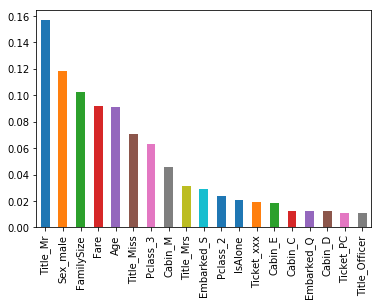

In [79]:
imp_feat[imp_feat>0.01].sort_values(ascending=False).plot(kind='bar')

In [129]:
predictions_rf = rf.predict(s_test.iloc[:,1:])

In [130]:
# Generate Submission File 
NumSubmission = pd.DataFrame({ 'PassengerId': PassengerId,
                            'Survived': predictions_clf })
NumSubmission.to_csv("NumSubmission_with_all_RF.csv", index=False)

# RF Grid Search

In [101]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 300, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [103]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 42, 74, 106, 138, 171, 203, 235, 267, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [104]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   25.8s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 42, 74, 106, 138, 171, 203, 235, 267, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [105]:
rf_random.best_params_

{'n_estimators': 203,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': True}

In [ ]:
#Finalize using best
rf=RandomForestClassifier(n_estimators=203,oob_score=True,n_jobs=-1,random_state=42, )